# Imports

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
plt.style.use('ggplot')

In [2]:
import warnings
warnings.filterwarnings("ignore")

# Скачиваем данные

In [3]:
x_train = pd.read_csv('./X_train.csv')
y_train = pd.read_csv('./Y_train.csv')
y = (y_train.target == 1) * 1

In [4]:
x_train.head()

,credit_card_utilization,age,overdue_30_59_days,debt_to_income,monthly_income,credits_loans,overdue__more_than_90_days,mortgage_loans,overdue_60_89_days,family_members
0,0.000000,56,0,0.504328,6823.894458,9,0,1,0,5.0
1,0.170659,45,1,2.405860,356.580765,5,0,0,0,0.0
2,0.342176,75,1,0.445066,20349.895825,9,0,3,0,0.0
3,0.046219,50,0,0.814508,2894.368968,12,0,1,0,3.0
4,0.679556,58,0,0.390311,24833.227614,15,0,4,0,2.0


In [5]:
x_train.shape

(105109, 10)

In [6]:
y.value_counts(normalize=True)

0    0.933108
1    0.066892
Name: target, dtype: float64

In [7]:
y[:5]

0    0
1    0
2    0
3    0
4    0
Name: target, dtype: int32

# Краткий анализ имеющихся данных

###### Проверка типов данных

In [8]:
x_train.dtypes

credit_card_utilization       float64
age                             int64
overdue_30_59_days              int64
debt_to_income                float64
monthly_income                float64
credits_loans                   int64
overdue__more_than_90_days      int64
mortgage_loans                  int64
overdue_60_89_days              int64
family_members                float64
dtype: object

###### Проверка пропусков

In [9]:
pd.isnull(x_train).sum()

credit_card_utilization           0
age                               0
overdue_30_59_days                0
debt_to_income                    0
monthly_income                20993
credits_loans                     0
overdue__more_than_90_days        0
mortgage_loans                    0
overdue_60_89_days                0
family_members                 2805
dtype: int64

###### Проверка количества уникальных

In [10]:
x_train.nunique()

credit_card_utilization        97475
age                               86
overdue_30_59_days                15
debt_to_income                102217
monthly_income                 82956
credits_loans                     59
overdue__more_than_90_days        16
mortgage_loans                    27
overdue_60_89_days                13
family_members                    13
dtype: int64

###### Баланс классов

In [11]:
x_train['overdue_30_59_days'].value_counts(normalize=True)

0     0.839709
1     0.107155
2     0.030759
3     0.011626
4     0.004995
5     0.002293
98    0.001798
6     0.000970
7     0.000352
8     0.000162
9     0.000076
96    0.000048
10    0.000038
12    0.000010
11    0.000010
Name: overdue_30_59_days, dtype: float64

###### Визуализация признаков

In [12]:
import numpy as np
import pandas as pd
from datetime import datetime

import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use("bmh")
plt.rcParams['font.family'] = 'DejaVu Sans'

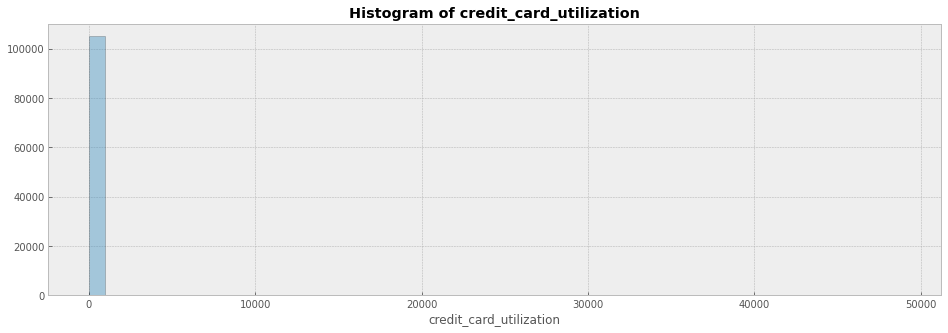

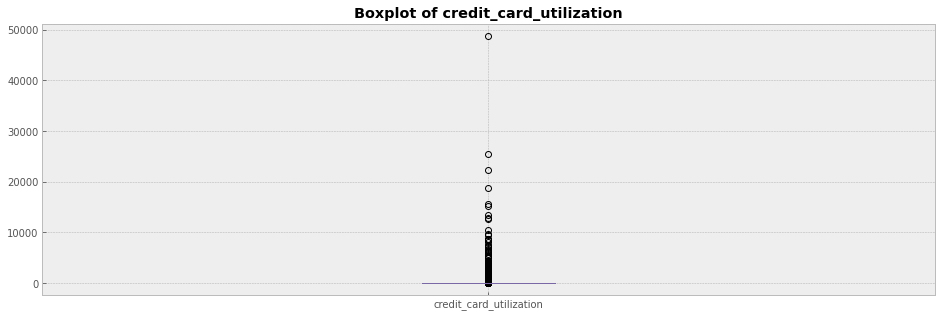

In [13]:
# простая гитограмма
fig = plt.figure(figsize=(16, 5))
sns.distplot(x_train.credit_card_utilization, hist=True, kde=False, 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.title("Histogram of credit_card_utilization", weight="bold")
plt.show()

#построим коробчатую диаграмму, чтобы лучше увидеть значения выбросов 
fig = plt.figure(figsize=(16, 5))
x_train.boxplot(column=['credit_card_utilization'])
plt.title("Boxplot of credit_card_utilization", weight="bold")
plt.show()

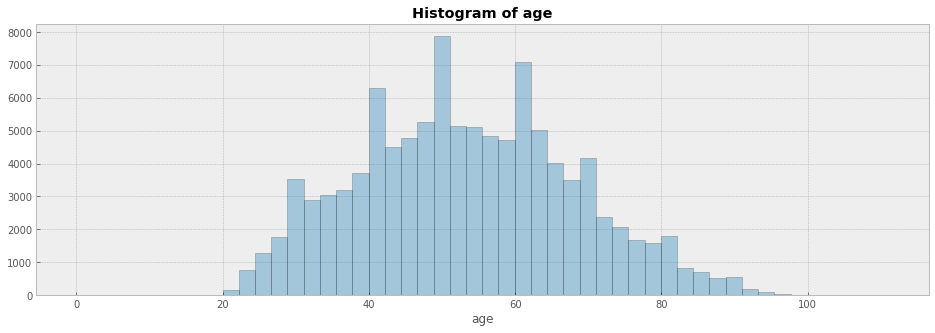

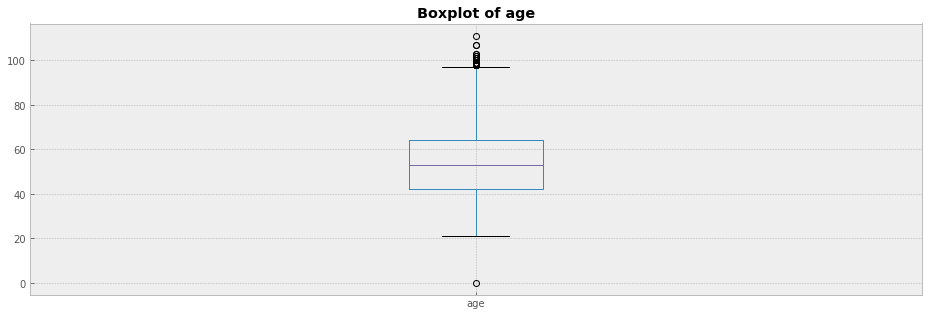

In [14]:
# простая гитограмма
fig = plt.figure(figsize=(16, 5))
sns.distplot(x_train.age, hist=True, kde=False, 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.title("Histogram of age", weight="bold")
plt.show()

#построим коробчатую диаграмму, чтобы лучше увидеть значения выбросов 
fig = plt.figure(figsize=(16, 5))
x_train.boxplot(column=['age'])
plt.title("Boxplot of age", weight="bold")
plt.show()

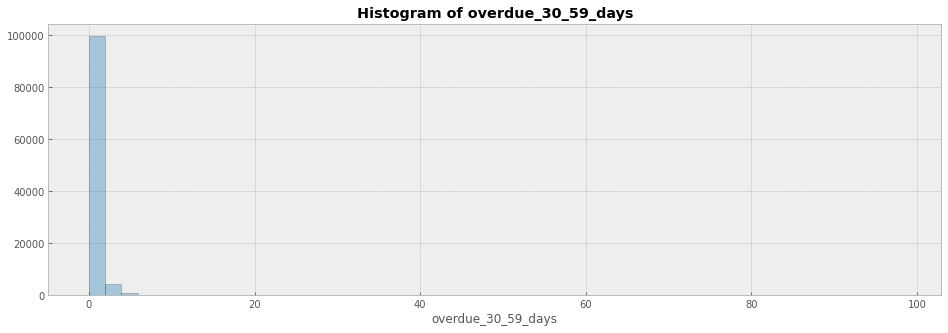

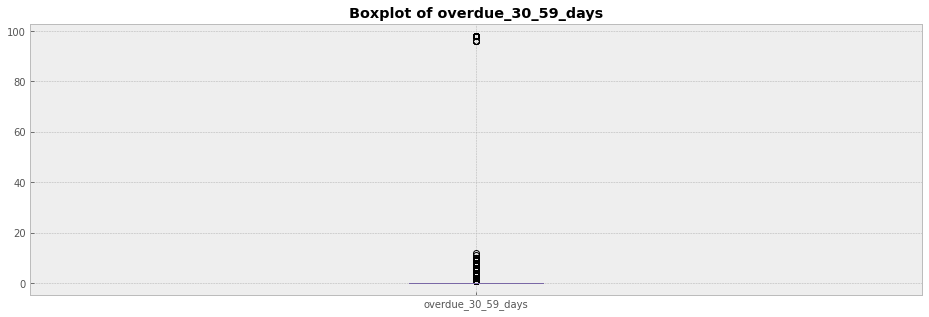

In [15]:
# простая гитограмма
fig = plt.figure(figsize=(16, 5))
sns.distplot(x_train['overdue_30_59_days'], hist=True, kde=False, 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.title("Histogram of overdue_30_59_days", weight="bold")
plt.show()

#построим коробчатую диаграмму, чтобы лучше увидеть значения выбросов 
fig = plt.figure(figsize=(16, 5))
x_train.boxplot(column=['overdue_30_59_days'])
plt.title("Boxplot of overdue_30_59_days", weight="bold")
plt.show()

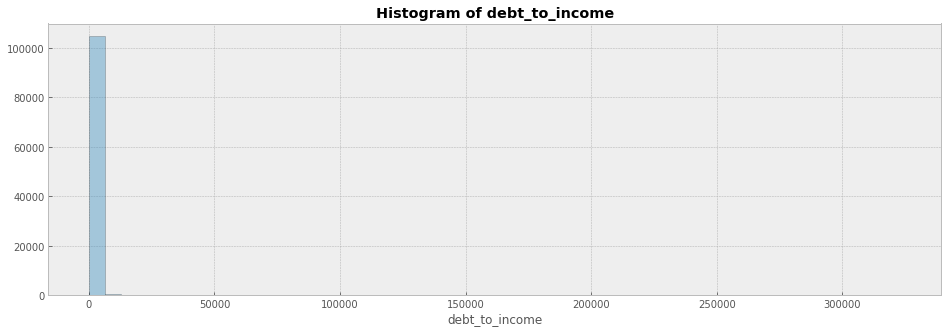

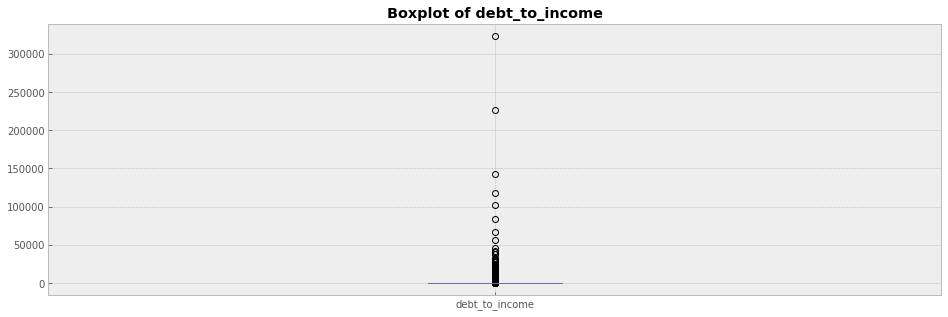

In [16]:
# простая гитограмма
fig = plt.figure(figsize=(16, 5))
sns.distplot(x_train['debt_to_income'], hist=True, kde=False, 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.title("Histogram of debt_to_income", weight="bold")
plt.show()

#построим коробчатую диаграмму, чтобы лучше увидеть значения выбросов 
fig = plt.figure(figsize=(16, 5))
x_train.boxplot(column=['debt_to_income'])
plt.title("Boxplot of debt_to_income", weight="bold")
plt.show()

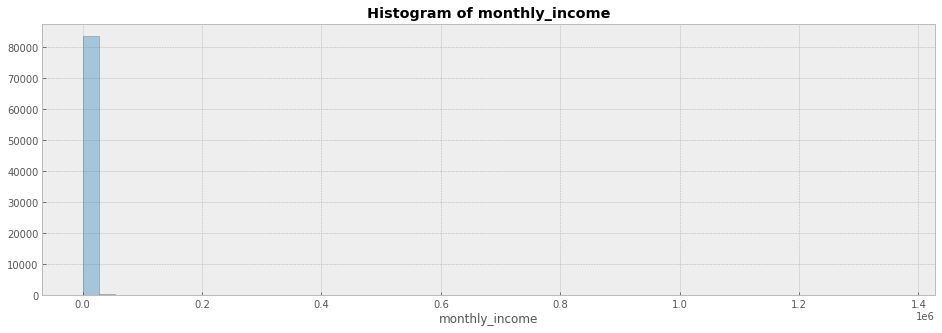

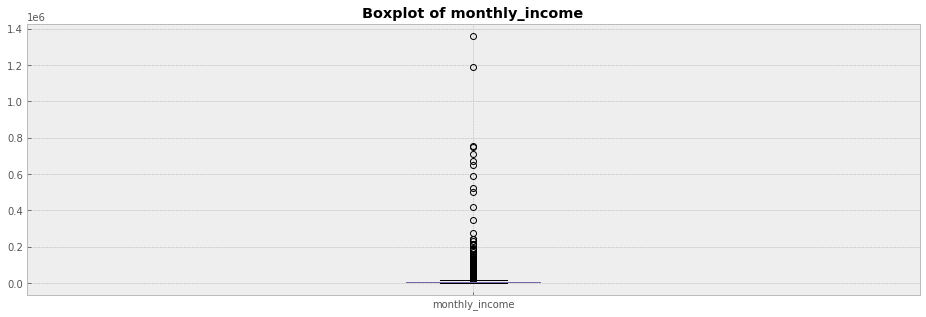

In [17]:
# простая гитограмма
fig = plt.figure(figsize=(16, 5))
sns.distplot(x_train['monthly_income'], hist=True, kde=False, 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.title("Histogram of monthly_income", weight="bold")
plt.show()

#построим коробчатую диаграмму, чтобы лучше увидеть значения выбросов 
fig = plt.figure(figsize=(16, 5))
x_train.boxplot(column=['monthly_income'])
plt.title("Boxplot of monthly_income", weight="bold")
plt.show()

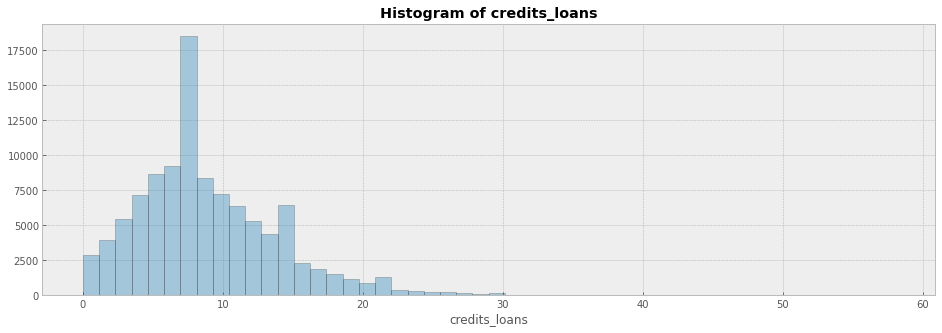

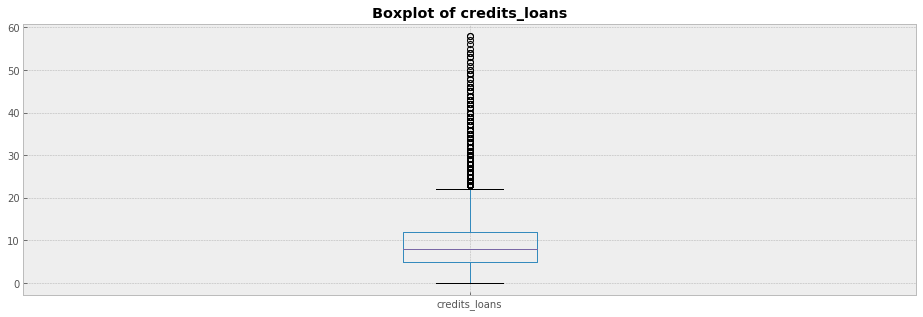

In [18]:
# простая гитограмма
fig = plt.figure(figsize=(16, 5))
sns.distplot(x_train['credits_loans'], hist=True, kde=False, 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.title("Histogram of credits_loans", weight="bold")
plt.show()

#построим коробчатую диаграмму, чтобы лучше увидеть значения выбросов 
fig = plt.figure(figsize=(16, 5))
x_train.boxplot(column=['credits_loans'])
plt.title("Boxplot of credits_loans", weight="bold")
plt.show()

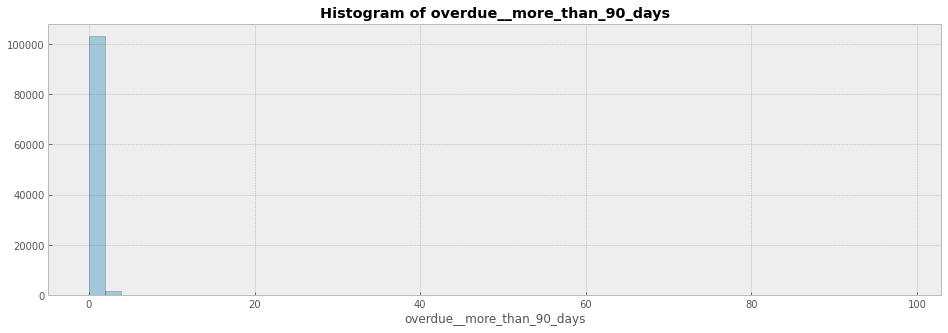

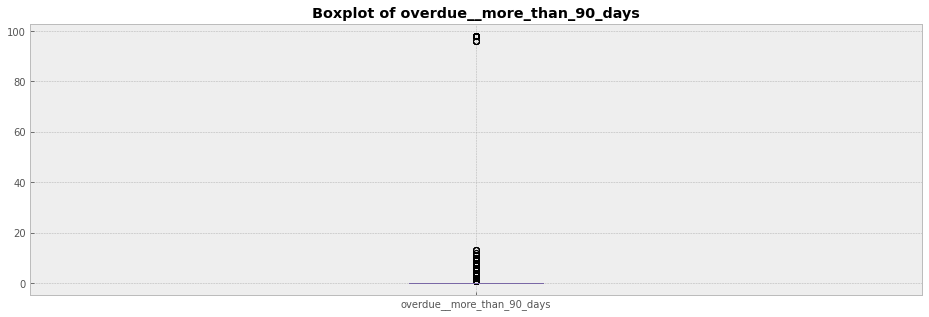

In [19]:
# простая гитограмма
fig = plt.figure(figsize=(16, 5))
sns.distplot(x_train['overdue__more_than_90_days'], hist=True, kde=False, 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.title("Histogram of overdue__more_than_90_days", weight="bold")
plt.show()

#построим коробчатую диаграмму, чтобы лучше увидеть значения выбросов 
fig = plt.figure(figsize=(16, 5))
x_train.boxplot(column=['overdue__more_than_90_days'])
plt.title("Boxplot of overdue__more_than_90_days", weight="bold")
plt.show()

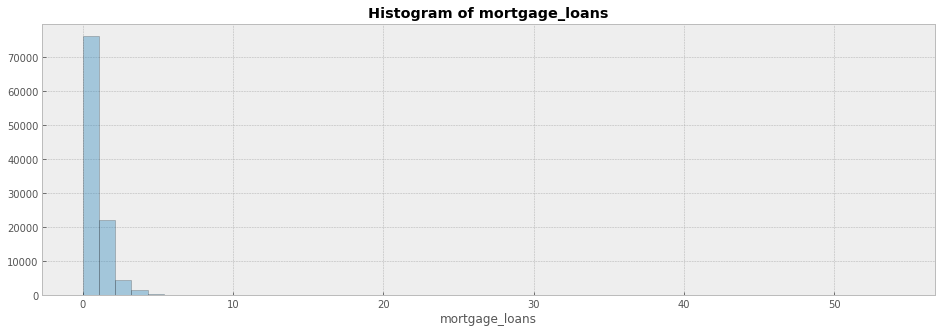

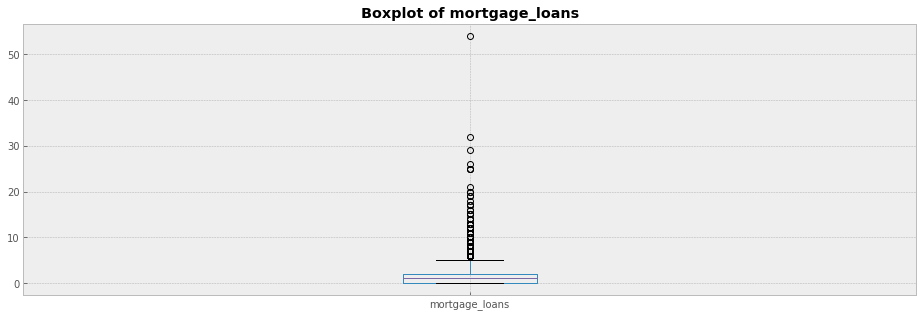

In [20]:
# простая гитограмма
fig = plt.figure(figsize=(16, 5))
sns.distplot(x_train['mortgage_loans'], hist=True, kde=False, 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.title("Histogram of mortgage_loans", weight="bold")
plt.show()

#построим коробчатую диаграмму, чтобы лучше увидеть значения выбросов 
fig = plt.figure(figsize=(16, 5))
x_train.boxplot(column=['mortgage_loans'])
plt.title("Boxplot of mortgage_loans", weight="bold")
plt.show()

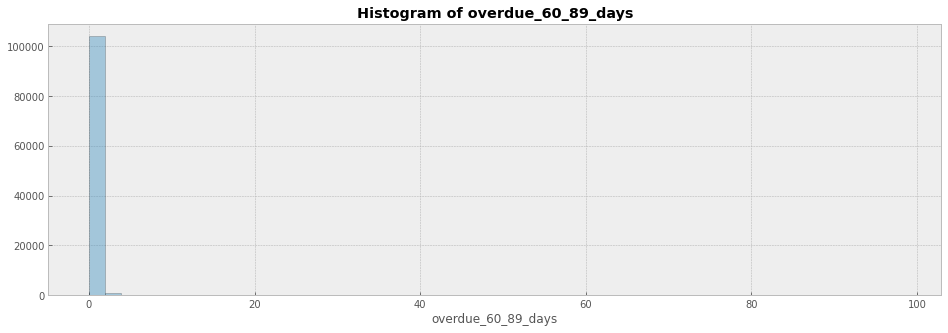

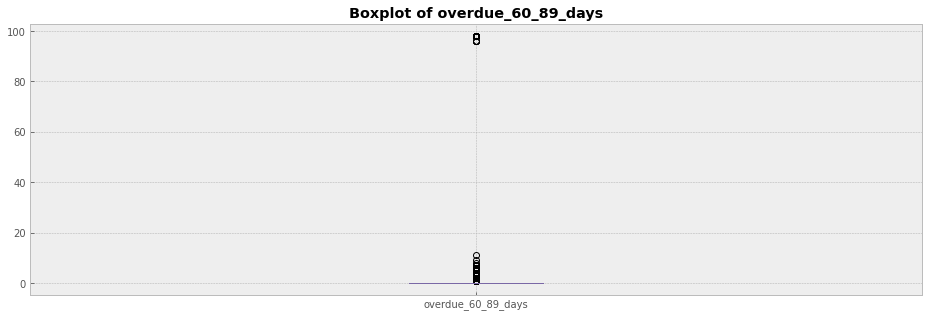

In [21]:
# простая гитограмма
fig = plt.figure(figsize=(16, 5))
sns.distplot(x_train['overdue_60_89_days'], hist=True, kde=False, 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.title("Histogram of overdue_60_89_days", weight="bold")
plt.show()

#построим коробчатую диаграмму, чтобы лучше увидеть значения выбросов 
fig = plt.figure(figsize=(16, 5))
x_train.boxplot(column=['overdue_60_89_days'])
plt.title("Boxplot of overdue_60_89_days", weight="bold")
plt.show()

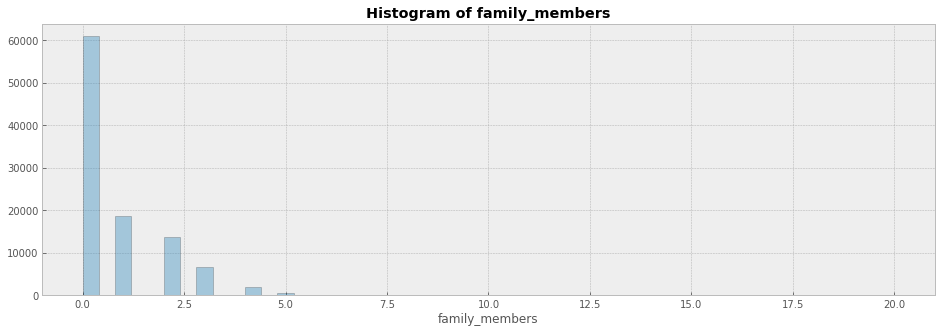

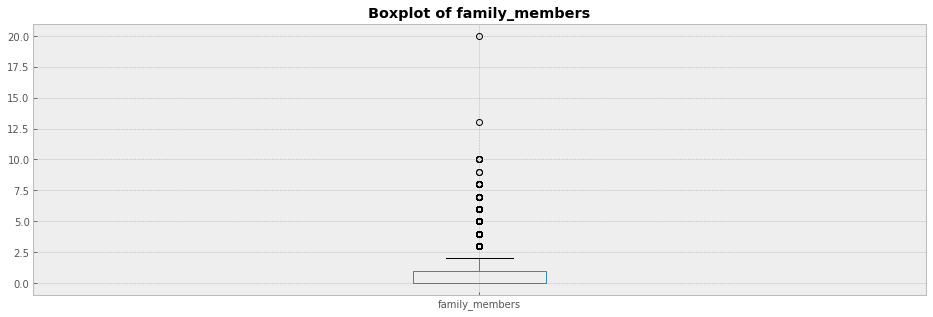

In [22]:
# простая гитограмма
fig = plt.figure(figsize=(16, 5))
sns.distplot(x_train['family_members'], hist=True, kde=False, 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 4})
plt.title("Histogram of family_members", weight="bold")
plt.show()

#построим коробчатую диаграмму, чтобы лучше увидеть значения выбросов 
fig = plt.figure(figsize=(16, 5))
x_train.boxplot(column=['family_members'])
plt.title("Boxplot of family_members", weight="bold")
plt.show()

In [23]:
#перед построением скаттерплотов посмотрим матрицы корреляции
corr=x_train.corr(method ='pearson')
corr.style.background_gradient(cmap='coolwarm')

,credit_card_utilization,age,overdue_30_59_days,debt_to_income,monthly_income,credits_loans,overdue__more_than_90_days,mortgage_loans,overdue_60_89_days,family_members
credit_card_utilization,1.000000,-0.007313,-0.001276,0.003155,0.011236,-0.010075,-0.000959,0.003955,-0.000945,0.002024
age,-0.007313,1.000000,-0.064367,0.023804,0.048908,0.148412,-0.062283,0.032206,-0.058455,-0.213706
overdue_30_59_days,-0.001276,-0.064367,1.000000,-0.007899,-0.013712,-0.056056,0.984247,-0.030510,0.987364,-0.003549
debt_to_income,0.003155,0.023804,-0.007899,1.000000,-0.037227,0.053406,-0.009179,0.129559,-0.008469,-0.049210
monthly_income,0.011236,0.048908,-0.013712,-0.037227,1.000000,0.117433,-0.017596,0.164191,-0.015749,0.075874
credits_loans,-0.010075,0.148412,-0.056056,0.053406,0.117433,1.000000,-0.080645,0.429016,-0.071783,0.065265
overdue__more_than_90_days,-0.000959,-0.062283,0.984247,-0.009179,-0.017596,-0.080645,1.000000,-0.045748,0.993282,-0.011628
mortgage_loans,0.003955,0.032206,-0.030510,0.129559,0.164191,0.429016,-0.045748,1.000000,-0.040200,0.123821
overdue_60_89_days,-0.000945,-0.058455,0.987364,-0.008469,-0.015749,-0.071783,0.993282,-0.040200,1.000000,-0.012482
family_members,0.002024,-0.213706,-0.003549,-0.049210,0.075874,0.065265,-0.011628,0.123821,-0.012482,1.000000


In [24]:
# как видно сильно коррелированы признак overdue_30_59_days с overdue__more_than_90_days и overdue_60_89_days (corr>0.9),
# поэтому можно оставить из этих трех признаков любой один, например overdue_30_59_days, остальные два удалим
columns_to_drop = ['overdue_60_89_days', 'overdue__more_than_90_days']
x_train.drop(columns_to_drop, axis=1,inplace=True)

# сильной корреляции между другими признаками не наблюдается 
x_train

,credit_card_utilization,age,overdue_30_59_days,debt_to_income,monthly_income,credits_loans,mortgage_loans,family_members
0,0.000000,56,0,0.504328,6823.894458,9,1,5.0
1,0.170659,45,1,2.405860,356.580765,5,0,0.0
2,0.342176,75,1,0.445066,20349.895825,9,3,0.0
3,0.046219,50,0,0.814508,2894.368968,12,1,3.0
4,0.679556,58,0,0.390311,24833.227614,15,4,2.0
...,...,...,...,...,...,...,...,...
105104,0.017608,62,0,0.184589,9928.125255,6,2,0.0
105105,0.980631,25,0,0.158753,2187.355843,3,0,0.0
105106,0.050256,73,1,0.849711,3961.841113,12,2,0.0
105107,0.447882,43,0,0.068033,3705.546719,4,0,0.0


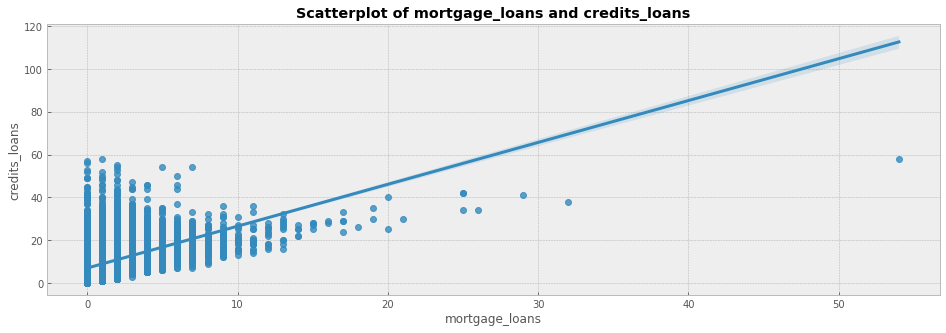

In [25]:
# так как более менее значимой корреляции мы не наблюдали, ожидать красивых скаттерплотов не приходится
# первым делом построим скаттерплот для credits_loans и mortgage_loans, так как у них коэфф корреляции ~0.4, 
# затем потроим скаттерплоты для всех отслальных признаков
# построение скаттерплотов между признаками с линейной регрессией для наглядности
fig = plt.figure(figsize=(16, 5))
sns.regplot(x=x_train['mortgage_loans'], y=x_train["credits_loans"], fit_reg=True)
plt.title("Scatterplot of mortgage_loans and credits_loans", weight="bold")
plt.show()

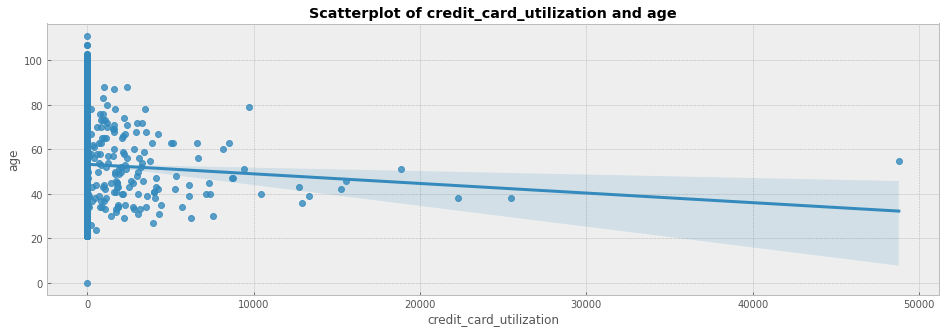

In [26]:
fig = plt.figure(figsize=(16, 5))
sns.regplot(x=x_train['credit_card_utilization'], y=x_train["age"], fit_reg=True)
plt.title("Scatterplot of credit_card_utilization and age", weight="bold")
plt.show()

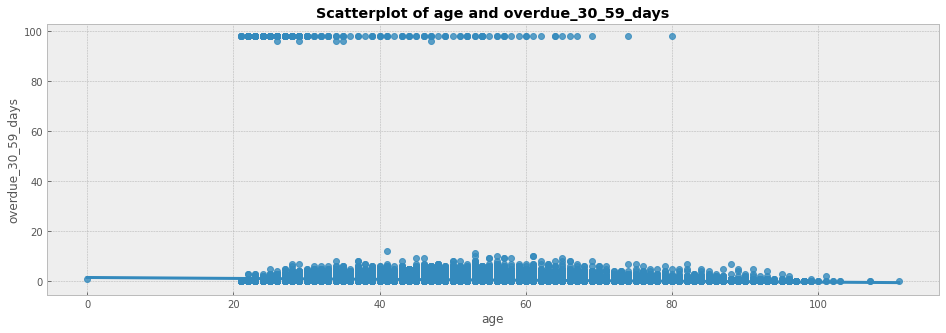

In [27]:
fig = plt.figure(figsize=(16, 5))
sns.regplot(x=x_train['age'], y=x_train["overdue_30_59_days"], fit_reg=True)
plt.title("Scatterplot of age and overdue_30_59_days", weight="bold")
plt.show()

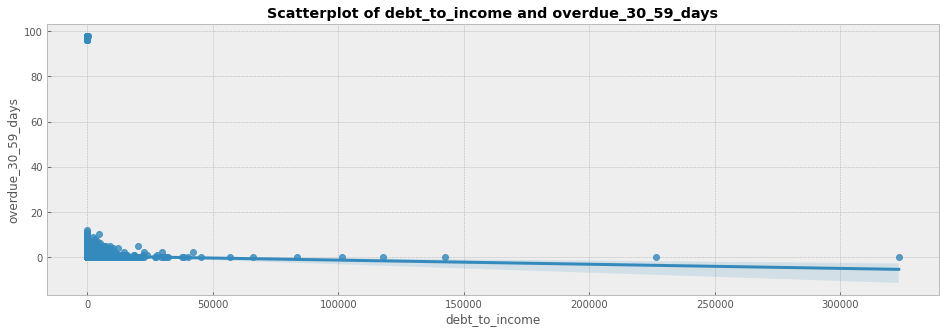

In [28]:
fig = plt.figure(figsize=(16, 5))
sns.regplot(x=x_train['debt_to_income'], y=x_train["overdue_30_59_days"], fit_reg=True)
plt.title("Scatterplot of debt_to_income and overdue_30_59_days", weight="bold")
plt.show()

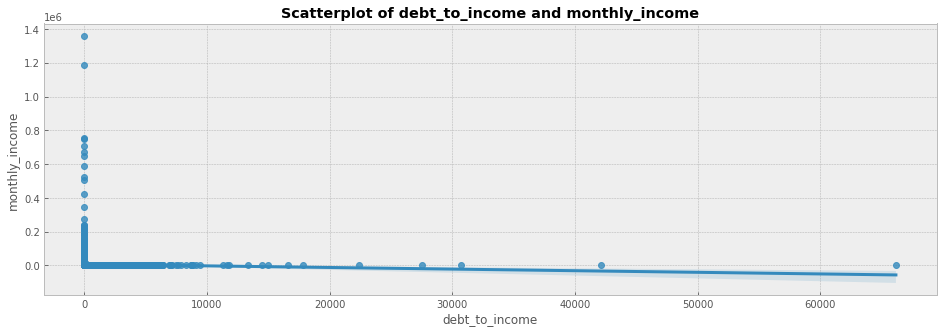

In [29]:
fig = plt.figure(figsize=(16, 5))
sns.regplot(x=x_train['debt_to_income'], y=x_train["monthly_income"], fit_reg=True)
plt.title("Scatterplot of debt_to_income and monthly_income", weight="bold")
plt.show()

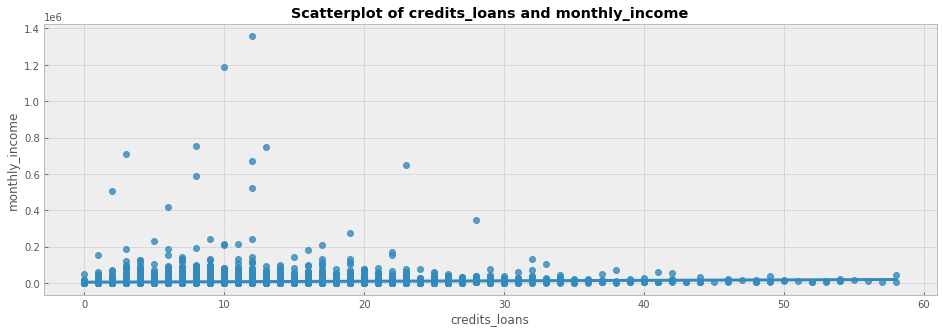

In [30]:
fig = plt.figure(figsize=(16, 5))
sns.regplot(x=x_train['credits_loans'], y=x_train["monthly_income"], fit_reg=True)
plt.title("Scatterplot of credits_loans and monthly_income", weight="bold")
plt.show()

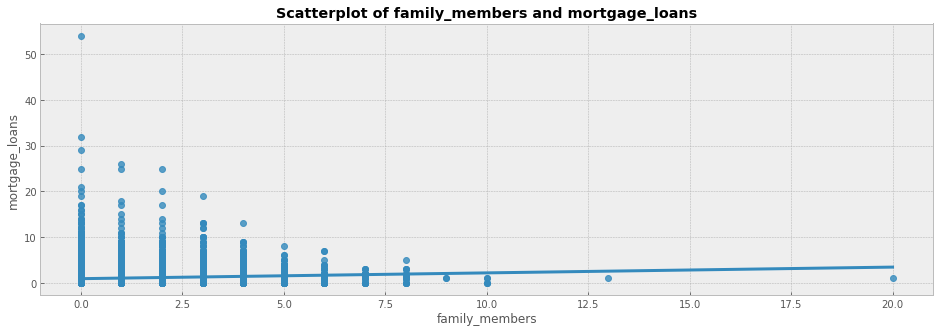

In [31]:
fig = plt.figure(figsize=(16, 5))
sns.regplot(x=x_train['family_members'], y=x_train["mortgage_loans"], fit_reg=True)
plt.title("Scatterplot of family_members and mortgage_loans", weight="bold")
plt.show()

# Предобработка данных

###### Заполнение пропусков
Заполняем пропущенные данные в месячном доходе и количестве членов семьи медианными значениями, так как эта метрика выглядит наиболее логичной

In [32]:
print ('Кол-во пропущенных в monthly_income:', sum(x_train['monthly_income'].isnull()))
x_train[x_train['monthly_income'].isnull()].head(5)

Кол-во пропущенных в monthly_income: 20993


,credit_card_utilization,age,overdue_30_59_days,debt_to_income,monthly_income,credits_loans,mortgage_loans,family_members
20,1.156862,69,0,34.666092,NaN,0,0,0.0
23,0.176205,93,0,297.962783,NaN,3,0,NaN
36,0.280279,49,0,2226.820771,NaN,6,2,2.0
39,0.148479,47,0,5322.022996,NaN,15,3,2.0
40,0.027631,55,0,7393.317898,NaN,12,2,0.0


In [33]:
x_train['monthly_income'].median()

5361.778459884576

In [34]:
x_train['monthly_income']=x_train['monthly_income'].fillna(x_train['monthly_income'].median())

x_train['monthly_income'][20:30]

20     5361.778460
21     3563.759868
22     9500.518840
23     5361.778460
24     4440.500414
25    21381.951686
26     2381.974505
27     2821.249473
28     5578.877263
29    10058.364487
Name: monthly_income, dtype: float64

In [35]:
print ('Кол-во пропущенных в family_members:', sum(x_train['family_members'].isnull()))
x_train[x_train['family_members'].isnull()].head(5)

Кол-во пропущенных в family_members: 2805


,credit_card_utilization,age,overdue_30_59_days,debt_to_income,monthly_income,credits_loans,mortgage_loans,family_members
23,0.176205,93,0,297.962783,5361.77846,3,0,NaN
43,0.049335,77,0,695.154036,5361.77846,8,1,NaN
58,1.170441,33,0,690.020506,5361.77846,4,0,NaN
135,0.000000,79,0,0.000000,5361.77846,2,0,NaN
164,1.029744,36,2,391.364373,5361.77846,3,0,NaN


In [36]:
x_train['family_members'].median()

0.0

In [37]:
x_train['family_members'] = x_train['family_members'].fillna(x_train['family_members'].median())

In [38]:
x_train['family_members'][20:30]

20    0.0
21    0.0
22    0.0
23    0.0
24    0.0
25    3.0
26    0.0
27    1.0
28    1.0
29    1.0
Name: family_members, dtype: float64

In [39]:
pd.isnull(x_train).sum()

credit_card_utilization    0
age                        0
overdue_30_59_days         0
debt_to_income             0
monthly_income             0
credits_loans              0
mortgage_loans             0
family_members             0
dtype: int64

In [40]:
# пропусков не осталось

##### Обработка выбросов

In [41]:
# применим способ удаления выбросов по боксплотам (https://www.machinelearningmastery.ru/5-ways-to-detect-outliers-that-every-data-scientist-should-know-python-code-70a54335a623/)
# Любые точки данных, которые показывают выше или ниже усов, могут считаться выбросами или аномальными. 

In [42]:
x_train

,credit_card_utilization,age,overdue_30_59_days,debt_to_income,monthly_income,credits_loans,mortgage_loans,family_members
0,0.000000,56,0,0.504328,6823.894458,9,1,5.0
1,0.170659,45,1,2.405860,356.580765,5,0,0.0
2,0.342176,75,1,0.445066,20349.895825,9,3,0.0
3,0.046219,50,0,0.814508,2894.368968,12,1,3.0
4,0.679556,58,0,0.390311,24833.227614,15,4,2.0
...,...,...,...,...,...,...,...,...
105104,0.017608,62,0,0.184589,9928.125255,6,2,0.0
105105,0.980631,25,0,0.158753,2187.355843,3,0,0.0
105106,0.050256,73,1,0.849711,3961.841113,12,2,0.0
105107,0.447882,43,0,0.068033,3705.546719,4,0,0.0


In [43]:
columns=x_train.columns

#посчитаем кол-во выбросов по признакам, чтобы не удалить случайно бОльшую часть датасета
outliers=[]
for i in columns:
    Q1 = x_train[i].quantile(0.25)
    Q3 = x_train[i].quantile(0.75)
    IQR = Q3 - Q1  
    filter = (x_train[i] >= Q1 - 1.5 * IQR) & (x_train[i] <= Q3 + 1.5 *IQR)
    j=i
    j=x_train.loc[filter]
    k=abs(j.shape[0]-x_train[i].shape[0])
    outliers.append(k)
x_train

,credit_card_utilization,age,overdue_30_59_days,debt_to_income,monthly_income,credits_loans,mortgage_loans,family_members
0,0.000000,56,0,0.504328,6823.894458,9,1,5.0
1,0.170659,45,1,2.405860,356.580765,5,0,0.0
2,0.342176,75,1,0.445066,20349.895825,9,3,0.0
3,0.046219,50,0,0.814508,2894.368968,12,1,3.0
4,0.679556,58,0,0.390311,24833.227614,15,4,2.0
...,...,...,...,...,...,...,...,...
105104,0.017608,62,0,0.184589,9928.125255,6,2,0.0
105105,0.980631,25,0,0.158753,2187.355843,3,0,0.0
105106,0.050256,73,1,0.849711,3961.841113,12,2,0.0
105107,0.447882,43,0,0.068033,3705.546719,4,0,0.0


In [44]:
print(outliers)
print(columns)

[560, 33, 16848, 22016, 6879, 1946, 550, 9327]
Index(['credit_card_utilization', 'age', 'overdue_30_59_days',
       'debt_to_income', 'monthly_income', 'credits_loans', 'mortgage_loans',
       'family_members'],
      dtype='object')


In [45]:
# видно, что больше всего выбросов по многим признакам кол-во выбросов по численной метрике боксплота довольно много, 
# и удаляется примерно половина датасета, что много 

# попробуем для признаков, где число выбросов > 5000 визуально задать границы выбросов по боксплотам
# для overdue_30_59_days > 80 выбросы
# для debt_to_income > 5000 выбросы
# для monthly_income > 0.4e6 выбросы
# для family_members > 10 выбросы

# наверняка есть нормальные метрики, но пока задал границы графически
# теперь посмотрим сколько исключений стало для новых границ по некоторым признакам
columns=x_train.columns

#посчитаем кол-во выбросов по признакам, чтобы не удалить случайно бОльшую часть датасета
outliers=[]
for i in columns:
    if i=='overdue_30_59_days':
        filter=(x_train[i] <= 80)
    elif i=='debt_to_income':
        filter=(x_train[i] <= 5000)
    elif i=='monthly_income':
        filter=(x_train[i] <= 0.4e6)
    elif i=='family_members':
        filter=(x_train[i] <= 10)
    else:
        Q1 = x_train[i].quantile(0.25)
        Q3 = x_train[i].quantile(0.75)
        IQR = Q3 - Q1  
        filter = (x_train[i] >= Q1 - 1.5 * IQR) & (x_train[i] <= Q3 + 1.5 *IQR)
    j=i
    j=x_train.loc[filter]
    k=abs(j.shape[0]-x_train[i].shape[0])
    outliers.append(k)
    
print(outliers)
print(columns)

[560, 33, 194, 1073, 11, 1946, 550, 2]
Index(['credit_card_utilization', 'age', 'overdue_30_59_days',
       'debt_to_income', 'monthly_income', 'credits_loans', 'mortgage_loans',
       'family_members'],
      dtype='object')


In [46]:
# видим что кол-во выбросов уменьшилось до адекватного значения, остеим полученные выбросы
for i in columns:
    if i=='overdue_30_59_days':
        filter=(x_train[i] <= 80)
        x_train=x_train.loc[filter]
    elif i=='debt_to_income':
        filter=(x_train[i] <= 5000)
        x_train=x_train.loc[filter]
    elif i=='monthly_income':
        filter=(x_train[i] <= 0.4e6)
        x_train=x_train.loc[filter]
    elif i=='family_members':
        filter=(x_train[i] <= 10)
        x_train=x_train.loc[filter]
    else:
        Q1 = x_train[i].quantile(0.25)
        Q3 = x_train[i].quantile(0.75)
        IQR = Q3 - Q1  
        filter = (x_train[i] >= Q1 - 1.5 * IQR) & (x_train[i] <= Q3 + 1.5 *IQR)
        x_train=x_train.loc[filter]
        
x_train

,credit_card_utilization,age,overdue_30_59_days,debt_to_income,monthly_income,credits_loans,mortgage_loans,family_members
0,0.000000,56,0,0.504328,6823.894458,9,1,5.0
1,0.170659,45,1,2.405860,356.580765,5,0,0.0
2,0.342176,75,1,0.445066,20349.895825,9,3,0.0
3,0.046219,50,0,0.814508,2894.368968,12,1,3.0
4,0.679556,58,0,0.390311,24833.227614,15,4,2.0
...,...,...,...,...,...,...,...,...
105104,0.017608,62,0,0.184589,9928.125255,6,2,0.0
105105,0.980631,25,0,0.158753,2187.355843,3,0,0.0
105106,0.050256,73,1,0.849711,3961.841113,12,2,0.0
105107,0.447882,43,0,0.068033,3705.546719,4,0,0.0


##### Масштабируем признаки

In [47]:
# отмасштабируем, попробуем санчала MinMaxScaler, так как пока непонятно нормально ли мы отфильтровали выбросы

from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler = MinMaxScaler(feature_range=(0, 1))

scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)

x_train_scaled

array([[0.        , 0.46052632, 0.        , ..., 0.40909091, 0.2       ,
        0.5       ],
       [0.12730498, 0.31578947, 0.08333333, ..., 0.22727273, 0.        ,
        0.        ],
       [0.25525014, 0.71052632, 0.08333333, ..., 0.40909091, 0.6       ,
        0.        ],
       ...,
       [0.03748872, 0.68421053, 0.08333333, ..., 0.54545455, 0.4       ,
        0.        ],
       [0.33410324, 0.28947368, 0.        , ..., 0.18181818, 0.        ,
        0.        ],
       [0.42056682, 0.38157895, 0.08333333, ..., 0.59090909, 0.6       ,
        0.1       ]])

# Кодирование категориальных признаков (не производилась)

In [48]:
x_train.head()

,credit_card_utilization,age,overdue_30_59_days,debt_to_income,monthly_income,credits_loans,mortgage_loans,family_members
0,0.000000,56,0,0.504328,6823.894458,9,1,5.0
1,0.170659,45,1,2.405860,356.580765,5,0,0.0
2,0.342176,75,1,0.445066,20349.895825,9,3,0.0
3,0.046219,50,0,0.814508,2894.368968,12,1,3.0
4,0.679556,58,0,0.390311,24833.227614,15,4,2.0


In [49]:
# у на все признаки числовые и категориальных признаков нет

##### приводим датает ответов к формату итогового датасета признаков

In [50]:
# all_nums = set(range(x_train.index.min(), x_train.index.max()))
# arr = set(x_train.index)
# print(all_nums - arr)

x_train.index

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            105099, 105100, 105101, 105102, 105103, 105104, 105105, 105106,
            105107, 105108],
           dtype='int64', length=101007)

In [51]:
x_train.shape

(101007, 8)

In [52]:
y_train

,target
0,0
1,0
2,0
3,0
4,0
...,...
105104,0
105105,0
105106,0
105107,0


In [53]:
Xtr=x_train_scaled

# удалим из тренировочных ответов строки, которые были до этого удалены из признакового датасета в ходе подготовки
y_train=y_train.iloc[x_train.index]
Ytr=y_train
Ytr

,target
0,0
1,0
2,0
3,0
4,0
...,...
105104,0
105105,0
105106,0
105107,0


# Выбор модели и оптимизация

##### Пробуем Gradient Boosting (проще использовать CatBoost или LightGBM) вместо линейной регресии

In [54]:
# from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import StratifiedKFold, GridSearchCV


In [55]:
import numpy as np
from catboost import CatBoostClassifier, Pool

model = CatBoostClassifier(iterations=2,
                           depth=2,
                           learning_rate=1,
                           loss_function='Logloss', # 'AUC'
                           verbose=True)

# пробуем разные гиперпараметры
params = {'depth': [2,4,6,8,10,12,14,16]}
cv = StratifiedKFold(shuffle=True, n_splits=5)
GS_GB = GridSearchCV(estimator=model, param_grid=params, cv=cv, scoring='roc_auc')

GS_GB.fit(X=Xtr, y=Ytr)

0:	learn: 0.2611603	total: 155ms	remaining: 155ms
1:	learn: 0.2075508	total: 159ms	remaining: 0us
0:	learn: 0.2614175	total: 4.17ms	remaining: 4.17ms
1:	learn: 0.2072866	total: 8.16ms	remaining: 0us
0:	learn: 0.2617254	total: 3.6ms	remaining: 3.6ms
1:	learn: 0.2074880	total: 8.03ms	remaining: 0us
0:	learn: 0.2619285	total: 4.29ms	remaining: 4.29ms
1:	learn: 0.2080817	total: 8.28ms	remaining: 0us
0:	learn: 0.2621136	total: 4.53ms	remaining: 4.53ms
1:	learn: 0.2079781	total: 8.96ms	remaining: 0us
0:	learn: 0.2587171	total: 4.44ms	remaining: 4.44ms
1:	learn: 0.2054173	total: 9.03ms	remaining: 0us
0:	learn: 0.2590644	total: 4.88ms	remaining: 4.88ms
1:	learn: 0.2052278	total: 9.26ms	remaining: 0us
0:	learn: 0.2588850	total: 4.74ms	remaining: 4.74ms
1:	learn: 0.2049907	total: 9.97ms	remaining: 0us
0:	learn: 0.2592299	total: 5.04ms	remaining: 5.04ms
1:	learn: 0.2057447	total: 9.51ms	remaining: 0us
0:	learn: 0.2594592	total: 4.54ms	remaining: 4.54ms
1:	learn: 0.2055763	total: 9.23ms	remaining:

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=True),
             estimator=<catboost.core.CatBoostClassifier object at 0x000001B560D260D0>,
             param_grid={'depth': [2, 4, 6, 8, 10, 12, 14, 16]},
             scoring='roc_auc')

In [56]:
# Лучшая модель при параметре "C"
GS_GB.best_params_

{'depth': 12}

In [57]:
# Лучший показатель ROC_AUC
GS_GB.best_score_

0.8217203637825395

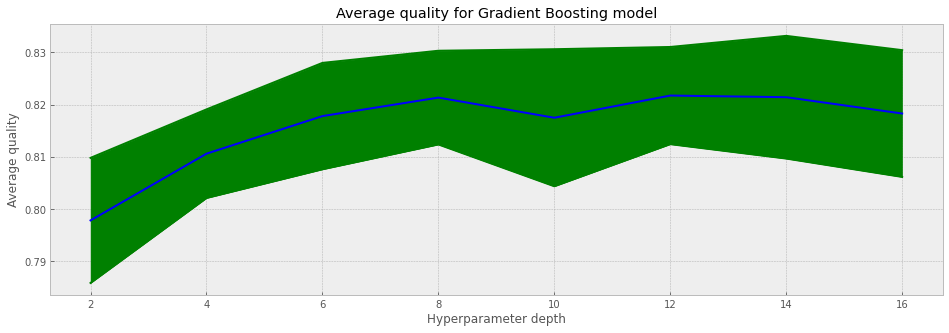

In [58]:
means = GS_GB.cv_results_['mean_test_score']
stds = GS_GB.cv_results_['std_test_score']
error = 1.95 * stds
fig = plt.figure(figsize=(16, 5))
plt.plot(params['depth'], means, color = 'blue')
plt.plot(params['depth'], means - error, color = 'green')
plt.plot(params['depth'], means + error, color = 'green')
plt.fill_between(params['depth'], means - error, means + error, color = 'green')
plt.xlabel('Hyperparameter depth')
plt.ylabel('Average quality')
plt.title('Average quality for Gradient Boosting model')
plt.show()

# Проводим тестирование модели Gradient Boosting

In [343]:
# скачаем тестовые данные и проведем всю обработку как для тренировочных данных
X_test = pd.read_csv('./X_test.csv')
X_test

,index,credit_card_utilization,age,overdue_30_59_days,debt_to_income,monthly_income,credits_loans,overdue__more_than_90_days,mortgage_loans,overdue_60_89_days,family_members
0,143522,0.021069,60,0,0.184907,14403.715440,9,0,1,0,0.0
1,116747,0.009985,82,0,0.446264,6768.581963,6,0,3,0,0.0
2,66075,0.535187,43,1,0.406317,4686.080429,14,0,2,0,3.0
3,133292,0.051264,31,0,0.311893,3867.175176,8,0,0,0,1.0
4,83134,0.069525,45,0,0.294956,9869.273012,6,0,1,0,2.0
...,...,...,...,...,...,...,...,...,...,...,...
38871,44475,0.731740,39,0,0.251005,3474.894386,5,0,0,0,0.0
38872,103189,0.010959,70,0,0.152539,4170.426464,14,0,1,0,0.0
38873,48732,0.084612,52,0,5288.053772,NaN,15,0,2,0,0.0
38874,135410,0.741717,51,0,0.378356,5441.458787,9,0,2,0,0.0


In [344]:
X_test['monthly_income']=X_test['monthly_income'].fillna(X_test['monthly_income'].median())
X_test['family_members'] = X_test['family_members'].fillna(X_test['family_members'].median())
X_test.drop('index', axis=1, inplace=True)

columns=X_test.columns
for i in columns:
    if i=='overdue_30_59_days':
        filter=(X_test[i] > 80)
        X_test.overdue_30_59_days.loc[filter]=80
    elif i=='debt_to_income':
        filter=(X_test[i] > 5000)
        X_test.debt_to_income.loc[filter]=5000
    elif i=='monthly_income':
        filter=(X_test[i] > 0.4e6)
        X_test.monthly_income.loc[filter]=0.4e6
    elif i=='family_members':
        filter=(X_test[i] > 10)
        X_test.family_members.loc[filter]=10
    else:
        Q1 = X_test[i].quantile(0.25)
        Q3 = X_test[i].quantile(0.75)
        IQR = Q3 - Q1  
        filter = (X_test[i] < Q1 - 1.5 * IQR)
        X_test[i].loc[filter]= Q1 - 1.5 * IQR
        filter = (X_test[i] > Q1 + 1.5 * IQR)
        X_test[i].loc[filter]= Q1 + 1.5 * IQR
        
X_test

,credit_card_utilization,age,overdue_30_59_days,debt_to_income,monthly_income,credits_loans,overdue__more_than_90_days,mortgage_loans,overdue_60_89_days,family_members
0,0.021069,60,0,0.184907,14403.715440,9.0,0,1,0,0.0
1,0.009985,75,0,0.446264,6768.581963,6.0,0,3,0,0.0
2,0.535187,43,1,0.406317,4686.080429,14.0,0,2,0,3.0
3,0.051264,31,0,0.311893,3867.175176,8.0,0,0,0,1.0
4,0.069525,45,0,0.294956,9869.273012,6.0,0,1,0,2.0
...,...,...,...,...,...,...,...,...,...,...
38871,0.731740,39,0,0.251005,3474.894386,5.0,0,0,0,0.0
38872,0.010959,70,0,0.152539,4170.426464,14.0,0,1,0,0.0
38873,0.084612,52,0,5000.000000,5339.618617,15.0,0,2,0,0.0
38874,0.741717,51,0,0.378356,5441.458787,9.0,0,2,0,0.0


In [345]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(X_test)
X_test_scaled = scaler.transform(X_test)
X_test_scaled

array([[0.025575  , 0.72222222, 0.        , ..., 0.33333333, 0.        ,
        0.        ],
       [0.01212047, 1.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.64964201, 0.40740741, 0.0125    , ..., 0.66666667, 0.        ,
        0.33333333],
       ...,
       [0.10270663, 0.57407407, 0.        , ..., 0.66666667, 0.        ,
        0.        ],
       [0.9003404 , 0.55555556, 0.        , ..., 0.66666667, 0.        ,
        0.        ],
       [0.01727176, 0.81481481, 0.        , ..., 0.33333333, 0.        ,
        0.        ]])

In [346]:
X_test_scaled.shape

(38876, 10)

In [347]:
model = CatBoostClassifier(iterations=2,
                           depth=12, # оптимальный гиперпараметр
                           learning_rate=1,
                           loss_function='Logloss',
                           verbose=True)

preds = GS_GB.predict_proba(X=X_test_scaled)[:, 1]

In [348]:
preds

array([0.07693418, 0.36042821, 0.41274268, ..., 0.30176694, 0.51519089,
       0.10710318])

In [349]:
preds.max()

0.6776094141284263

In [350]:
preds.min()

0.0466723928394648

In [351]:
y_test_sample = pd.read_csv('./y_test_sample.csv')

In [352]:
preds.shape

(38876,)

In [353]:
y_test_sample["target"] = preds

In [354]:
print(y_test_sample)

        index    target
0      143522  0.076934
1      116747  0.360428
2       66075  0.412743
3      133292  0.066171
4       83134  0.059902
...       ...       ...
38871   44475  0.186009
38872  103189  0.089668
38873   48732  0.301767
38874  135410  0.515191
38875   73457  0.107103

[38876 rows x 2 columns]


In [355]:
y_test_sample.to_csv('./y_test_sample.csv', index=False)

In [356]:
y_test_sample_new = pd.read_csv('./y_test_sample.csv')
y_test_sample_new

,index,target
0,143522,0.076934
1,116747,0.360428
2,66075,0.412743
3,133292,0.066171
4,83134,0.059902
...,...,...
38871,44475,0.186009
38872,103189,0.089668
38873,48732,0.301767
38874,135410,0.515191


In [360]:
y_test_sample_new.loc[y_test_sample_new['target'] > 0.5, ['target']]

,target
29,0.515191
41,0.526292
105,0.505798
184,0.515191
203,0.526292
...,...
38646,0.506600
38660,0.515191
38670,0.526292
38763,0.514356


In [361]:
y_test_sample_new.loc[y_test_sample_new['target'] < 0.5, ['target']]

,target
0,0.076934
1,0.360428
2,0.412743
3,0.066171
4,0.059902
...,...
38870,0.169622
38871,0.186009
38872,0.089668
38873,0.301767
